In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest


In [7]:
#load dataa
df = pd.read_csv('VNM.csv')
df.head()

,symbol,time,price,volume
0,VNM,2020-07-10 14:47:03,115.3,16660
1,VNM,2020-07-10 14:30:03,115.4,1000
2,VNM,2020-07-10 14:30:01,115.4,450
3,VNM,2020-07-10 14:29:45,115.4,660
4,VNM,2020-07-10 14:29:35,115.4,200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674488 entries, 0 to 674487
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  674488 non-null  object 
 1   time    674488 non-null  object 
 2   price   674488 non-null  float64
 3   volume  674488 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 20.6+ MB


time columns as a object, it should be a datetime type

In [9]:
df['time'] = pd.to_datetime(df['time'])

In [10]:
df.describe()

,price,volume
count,674488.000000,6.744880e+05
mean,137.262721,1.565956e+03
std,28.859136,2.549325e+04
min,83.700000,1.000000e+00
25%,117.800000,8.000000e+01
50%,132.000000,3.200000e+02
75%,151.400000,1.040000e+03
max,215.000000,1.887654e+07


In [11]:
df.shape

(674488, 4)

In [12]:
# create date column
df['date'] = df['time'].dt.date
df

,symbol,time,price,volume,date
0,VNM,2020-07-10 14:47:03,115.3,16660,2020-07-10
1,VNM,2020-07-10 14:30:03,115.4,1000,2020-07-10
2,VNM,2020-07-10 14:30:01,115.4,450,2020-07-10
3,VNM,2020-07-10 14:29:45,115.4,660,2020-07-10
4,VNM,2020-07-10 14:29:35,115.4,200,2020-07-10
...,...,...,...,...,...
674483,VNM,2014-10-27 00:23:44,106.0,10,2014-10-27
674484,VNM,2014-10-27 00:22:49,105.0,50,2014-10-27
674485,VNM,2014-10-27 00:16:40,106.0,10,2014-10-27
674486,VNM,2014-10-27 00:15:15,105.0,30,2014-10-27


In [13]:
#creade trade_value column
df['trade_value'] = df['price']*df['volume']

In [14]:
# find mean value stocks
df_avg_price = df.groupby(['date'])['volume', 'trade_value'].sum()
df_avg_price['avg_price'] = df_avg_price['trade_value']/df_avg_price['volume']
df_avg_price

C:\Users\Tam Khong\AppData\Local\Temp\ipykernel_8796\3062597190.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg_price = df.groupby(['date'])['volume', 'trade_value'].sum()


,volume,trade_value,avg_price
date,,,
2014-10-27,68880,7223620.0,104.872532
2014-10-29,27810,2892260.0,104.000719
2014-10-30,49530,5197670.0,104.939834
2014-11-03,20410,2155160.0,105.593337
2014-11-05,125160,13045320.0,104.229147
...,...,...,...
2020-07-06,1319980,152240966.0,115.335813
2020-07-07,1024960,119346196.0,116.439857
2020-07-08,551310,63805697.0,115.734699


In [15]:
#explore data df_avg_price
df_avg_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1318 entries, 2014-10-27 to 2020-07-10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   volume       1318 non-null   int64  
 1   trade_value  1318 non-null   float64
 2   avg_price    1318 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 41.2+ KB


In [16]:
#reset index to get date column
df_avg_price = df_avg_price.reset_index()
df_avg_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1318 non-null   object 
 1   volume       1318 non-null   int64  
 2   trade_value  1318 non-null   float64
 3   avg_price    1318 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 41.3+ KB


In [17]:
#conver date column to datetime type
df_avg_price['date'] = pd.to_datetime(df_avg_price['date'])

In [18]:
df_avg_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1318 non-null   datetime64[ns]
 1   volume       1318 non-null   int64         
 2   trade_value  1318 non-null   float64       
 3   avg_price    1318 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 41.3 KB


In [19]:
# arrange data by order date
df_avg_price = df_avg_price.sort_values(by=['date'], ascending = False)
df_avg_price.head()

,date,volume,trade_value,avg_price
1317,2020-07-10,677180,78415689.0,115.797408
1316,2020-07-09,1560410,181141529.0,116.085855
1315,2020-07-08,551310,63805697.0,115.734699
1314,2020-07-07,1024960,119346196.0,116.439857
1313,2020-07-06,1319980,152240966.0,115.335813


In [20]:
df_avg_price.describe()

,volume,trade_value,avg_price
count,1.318000e+03,1.318000e+03,1318.000000
mean,8.013798e+05,1.112912e+08,136.770054
std,8.625206e+05,1.238176e+08,26.715244
min,2.913000e+03,3.612120e+05,84.764400
25%,3.382375e+05,4.410212e+07,119.588663
50%,6.499100e+05,8.893423e+07,133.040233
75%,1.060290e+06,1.503052e+08,148.547710
max,1.907396e+07,2.733192e+09,214.305513


In [21]:
# find different between two consecutive date in avg_price column
df_avg_price['delta'] = df_avg_price['avg_price'].diff(periods = -1) # compare the current day to the date after
df_avg_price.head()

,date,volume,trade_value,avg_price,delta
1317,2020-07-10,677180,78415689.0,115.797408,-0.288447
1316,2020-07-09,1560410,181141529.0,116.085855,0.351156
1315,2020-07-08,551310,63805697.0,115.734699,-0.705158
1314,2020-07-07,1024960,119346196.0,116.439857,1.104045
1313,2020-07-06,1319980,152240966.0,115.335813,1.370475


In [22]:
# create pn column to assign avg_price that increase (1) and descrease (1)
# if avg_price increase > 0.009K assign 1 and vice versa
df_avg_price['pn'] = 0
df_avg_price.loc[df_avg_price['delta']>0.009, 'pn'] = 1
df_avg_price.loc[df_avg_price['delta']<-0.009, 'pn'] = -1
df_avg_price.head()


,date,volume,trade_value,avg_price,delta,pn
1317,2020-07-10,677180,78415689.0,115.797408,-0.288447,-1
1316,2020-07-09,1560410,181141529.0,116.085855,0.351156,1
1315,2020-07-08,551310,63805697.0,115.734699,-0.705158,-1
1314,2020-07-07,1024960,119346196.0,116.439857,1.104045,1
1313,2020-07-06,1319980,152240966.0,115.335813,1.370475,1


In [23]:
# count value in pn column
pn_count = pd.crosstab(index=df_avg_price['pn'], columns='count')
pn_count

col_0,count
pn,
-1,665
0,8
1,645


In [24]:
# create day column
df['day'] = df['time'].dt.dayofweek
df.head()

,symbol,time,price,volume,date,trade_value,day
0,VNM,2020-07-10 14:47:03,115.3,16660,2020-07-10,1920898.0,4
1,VNM,2020-07-10 14:30:03,115.4,1000,2020-07-10,115400.0,4
2,VNM,2020-07-10 14:30:01,115.4,450,2020-07-10,51930.0,4
3,VNM,2020-07-10 14:29:45,115.4,660,2020-07-10,76164.0,4
4,VNM,2020-07-10 14:29:35,115.4,200,2020-07-10,23080.0,4


In [25]:
df_avg_price['day'] = df_avg_price['date'].dt.dayofweek
df_avg_price.head()

,date,volume,trade_value,avg_price,delta,pn,day
1317,2020-07-10,677180,78415689.0,115.797408,-0.288447,-1,4
1316,2020-07-09,1560410,181141529.0,116.085855,0.351156,1,3
1315,2020-07-08,551310,63805697.0,115.734699,-0.705158,-1,2
1314,2020-07-07,1024960,119346196.0,116.439857,1.104045,1,1
1313,2020-07-06,1319980,152240966.0,115.335813,1.370475,1,0


In [26]:
#distribute increase/descrease/stable by day of week
df_day_pn = pd.crosstab(df_avg_price['day'], df_avg_price['pn'])
df_day_pn

pn,-1,0,1
day,,,
0,138,2,118
1,137,3,120
2,121,1,143
3,126,1,140
4,143,1,124


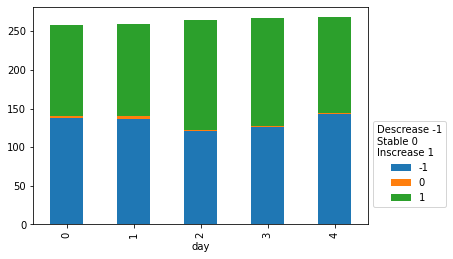

In [27]:
#visualize data
df_day_pn.plot.bar(stacked=True)
plt.legend(title = 'Descrease -1\nStable 0\nInscrease 1', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [28]:
#increase/descrease rate by day, checking proportions
df_day_pn


pn,-1,0,1
day,,,
0,138,2,118
1,137,3,120
2,121,1,143
3,126,1,140
4,143,1,124


In [30]:
# count number of increase/descrease in Wednesdays
count = np.array([143,121])
nobs = np.array([265,265]) # total transaction on Wednesdays 121+1+143=265
zstat, pval = proportions_ztest(count, nobs)
print('ztest_rate: ',zstat)
print('p_value: ', pval)

ztest_rate:  1.9112514762620285
p_value:  0.05597227155191926


ztest_rate = 1.9 shows that the difference between increase day and descrease day occurred on every Wednesday. Moreover, p_rate = 0.056 > 0.05

In [32]:
#normalize df_day_pn
df_day_pn_percentage = pd.crosstab(df_avg_price['day'], df_avg_price['pn'], normalize='index').round(4)*100
print('% Increase/Descrease by day: ', df_day_pn_percentage)

% Increase/Descrease by day:  pn      -1     0      1
day                    
0    53.49  0.78  45.74
1    52.69  1.15  46.15
2    45.66  0.38  53.96
3    47.19  0.37  52.43
4    53.36  0.37  46.27
